# Laboratorio #9
##Jhoan Londoño Restrepo
### Curso de aprendizaje estadístico

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<p><a name="arb"></a></p>

# **Árboles de decisión**

Los árboles de decisión son algoritmos que pueden ser usados tanto para clasificación como para regresión. Consisten en una secuencia de preguntas si/sino (if/else) que llevan a la decisión final.

Deseamos clasificar el conjunto de iris, con las flores setosa, versicolor y virginica

In [2]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


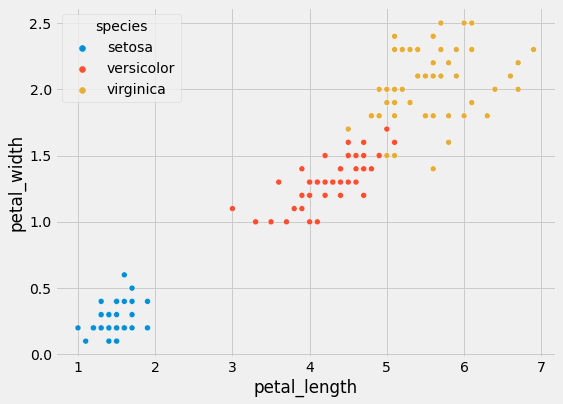

In [49]:
X = data[['petal_length' ,'petal_width']]
y = data['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})

plt.figure(figsize=(8,6))
sns.scatterplot(data = data, x = 'petal_length' ,y= 'petal_width', hue = 'species');

Aprender un árbol de decisiones significa aprender la secuencia de preguntas si/si no que nos lleva a la respuesta verdadera más rápidamente. En el contexto del ML, estas preguntas se denominan *tests*. 

Por lo general, los datos no vienen en forma de características binarias sí/no como en el ejemplo inicial de la clasificación de los animales, sino que se representan como características continuas como el `petal_length` en el conjunto de datos Iris. Los *test* que se utilizan en datos continuos son de la forma "¿La característica $x$ es mayor/menor que el valor $y$?"

Para construir un árbol, el algoritmo busca entre todos los *tests* posibles y encuentra el que es más informativo sobre la variable objetivo.

El proceso de ajustar un árbol de decisiones a nuestros datos se puede realizar en Scikit-Learn con el estimador `DecisionTreeClassifier` del submódulo `tree`. Con el hiperparámetro `max_depth` podemos especificar el número de niveles o la profundidad del árbol. Comencemos con un árbol de un nivel:

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier(random_state=42, max_depth=1).fit(X,y)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
dt_clf.fit(X_train, y_train)

print(f"El train score es:{dt_clf.score(X_test, y_test)} ")
print(f"El test score es:{dt_clf.score(X_train, y_train)}" )

El train score es:0.68 
El test score es:0.66


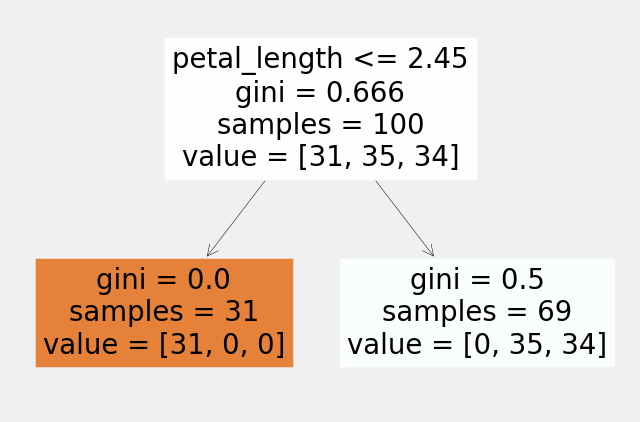

In [53]:
plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names = ['petal_length' ,'petal_width'],filled=True);

Note que en este caso el primer *test* que se elige es: ¿Es la longitud del pétalo menor o igual a 2.45? Al nodo de la izquierda se van las instancias que responden positivamente al *test* y al nodo de la derecha las que responden negativamente. Esto representa separar nuestras instancias verticalmente en `petal_lenght=2.45`

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


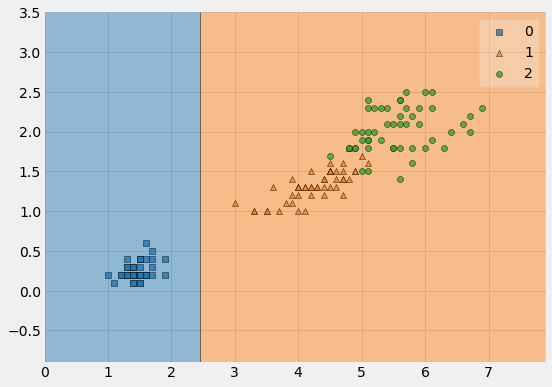

In [54]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, dt_clf);

Note que hemos separado las instancias en dos clases. Podemos construir un modelo más preciso repitiendo el proceso de buscar el mejor *test* en ambas regiones:


El train score es:0.98 
El test score es:0.95


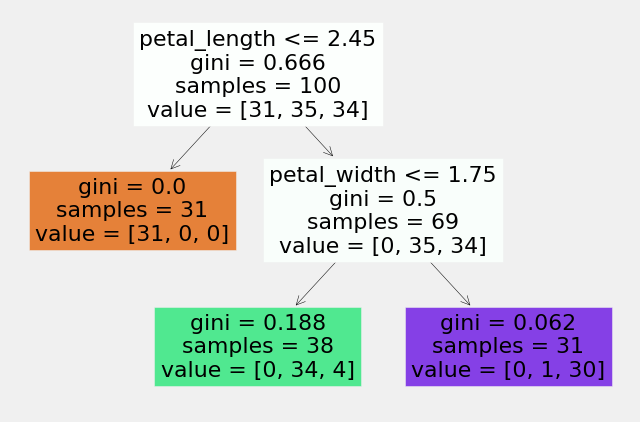

In [55]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=2).fit(X_train, y_train)

print(f"El train score es:{dt_clf.score(X_test, y_test)} ")
print(f"El test score es:{dt_clf.score(X_train, y_train)}" )

plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=['petal_length' ,'petal_width'],filled=True);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


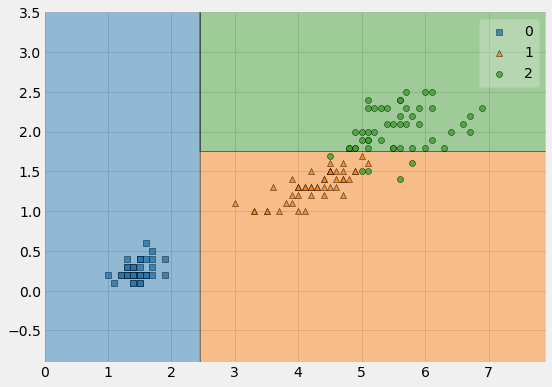

In [56]:
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, dt_clf);

Este modelo nos sigue presentando error en algunas variables

El train score es:0.98 
El test score es:0.97


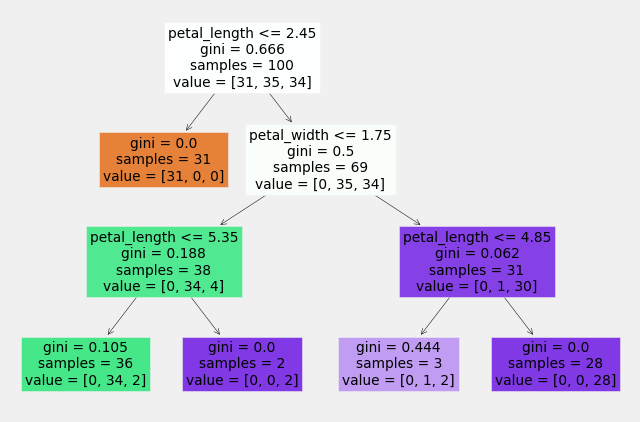

In [57]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X_train, y_train)

print(f"El train score es:{dt_clf.score(X_test, y_test)} ")
print(f"El test score es:{dt_clf.score(X_train, y_train)}" )

plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=['petal_length' ,'petal_width'],filled=True);

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


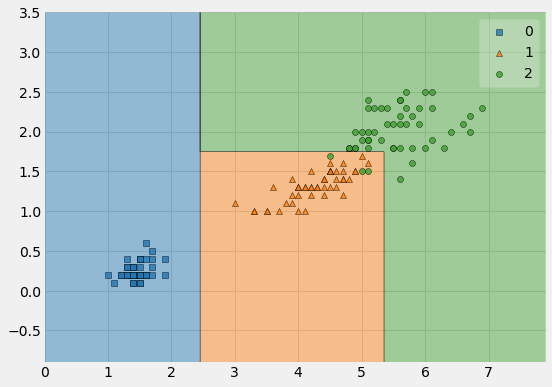

In [58]:
plt.figure(figsize=(8,6))
plot_decision_regions(X.values, y.values, dt_clf);

Este modelo sería el más apropiado para una buena clasificación aún así hayan 2 valores fuera de la frontera, si continuamos incrementando la complejidad del modelo esto generaría un overfiting, el modelo se aprendería los datos de train y sería incapaz de generalizar

In [59]:
feature_list = list(X.columns)
# Get numerical feature importances
importances = list(dt_clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: petal_length         Importance: 0.59
Variable: petal_width          Importance: 0.41


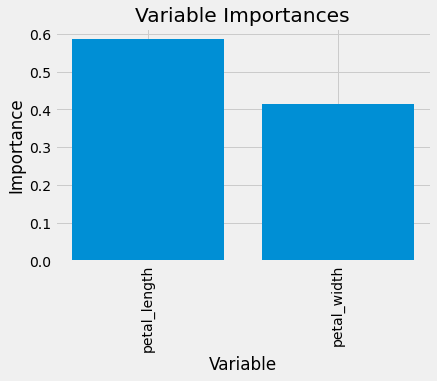

In [60]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

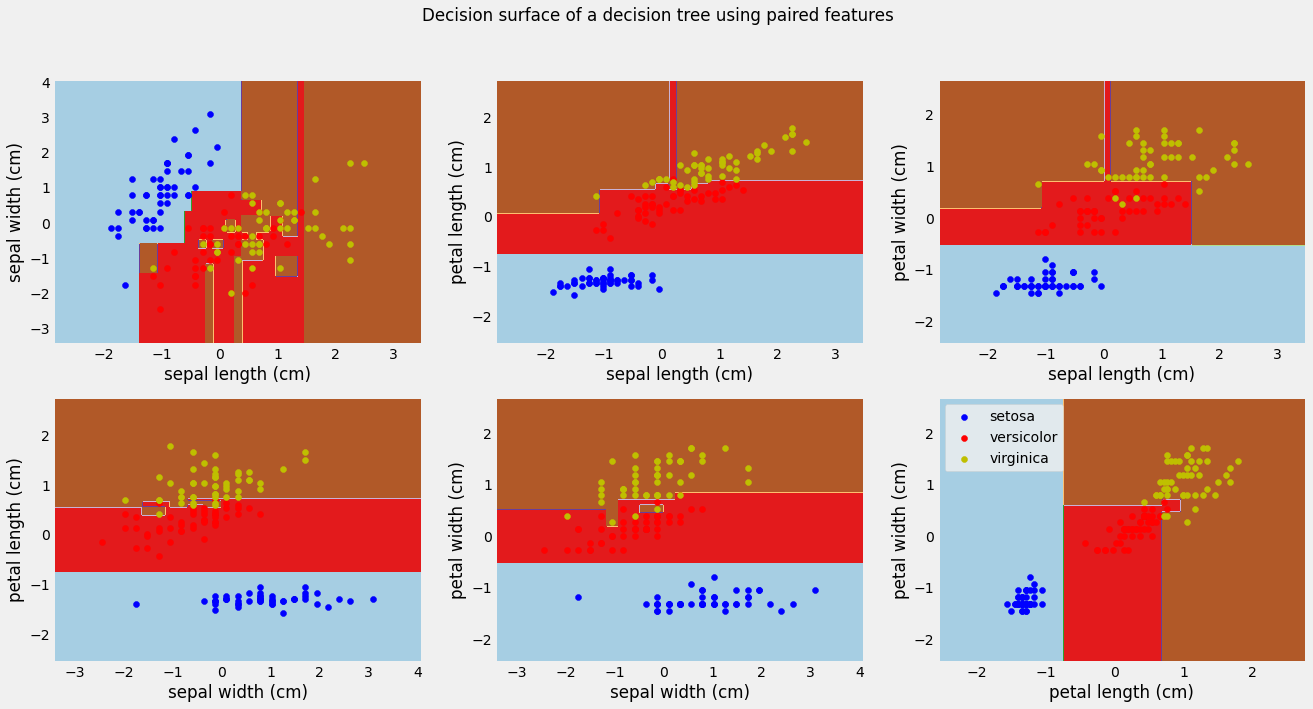

In [61]:
# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(20,10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    
    plt.subplot(2, 3, pairidx + 1)
  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()